In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = df.iloc[:, 3:5]

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
SpeciesToNum = { 'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [9]:
df['SpeciesToNum'] = df['Species'].map(SpeciesToNum)

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesToNum
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
X = np.array(X)
y = np.array(df['SpeciesToNum'])

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn import svm

In [36]:
clf = svm.SVC( kernel= 'poly', C = 1, degree = 3)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state =0)

In [39]:
Scaler = StandardScaler()

In [40]:
X_std_train = Scaler.fit_transform(X_train)

In [41]:
clf.fit(X_std_train, y_train)

SVC(C=1, kernel='poly')

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [45]:
res = cross_val_score( clf, X_std_train, y_train, cv = 10, scoring = 'accuracy')

In [46]:
res.mean()

np.float64(0.956060606060606)

In [47]:
y_train_pred = cross_val_predict( clf, X_std_train, y_train, method = 'predict')

In [48]:
confusion_matrix(y_train, y_train_pred)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  5, 36]])

In [51]:
precision = precision_score(y_train, y_train_pred, average = None)

In [52]:
precision

array([1.        , 0.87179487, 1.        ])

In [59]:
X = df.iloc[:, 3:5]
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [60]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

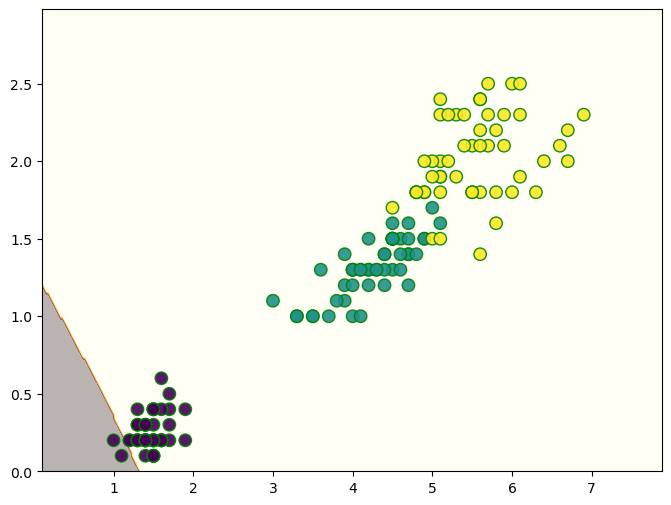

In [61]:
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
            alpha=0.9, edgecolors='g');